In [1]:
# Install the required packages
! pip install pandas matplotlib numpy

# Suppress depreciation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Import the required modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import helper_functions

### Plot tree locations and stem area from RCT

In [2]:
inventory_df = pd.read_csv('../data/inventory_data.csv')
# Filter to only include the data for Mak1
inventory_df = inventory_df[inventory_df['plot_id'] == 'Mak1']
inventory_df

,plot_id,utm_zone,easting,northing,avg_easting,avg_northing,tree_number,forest_stand,bearing,distance,...,species _name,species_scientific_name,dbh,quality_class,crown_class,height,height_crown,base_tree_ht,base_crown_ht,remarks
0,Mak1,45,305028,3030843,305029,3030844,1,1,9,17.9,...,Sal,Shorea robusta,15.2,1,2,16.60,11.5,NaN,NaN,NaN
1,Mak1,45,305028,3030843,305029,3030844,2,1,10,15.4,...,Sal,Shorea robusta,14.0,1,2,12.60,5.8,NaN,NaN,NaN
2,Mak1,45,305028,3030843,305029,3030844,3,1,12,6.7,...,Sal,Shorea robusta,16.5,1,1,18.30,7.5,NaN,NaN,NaN
3,Mak1,45,305028,3030843,305029,3030844,4,1,19,18.0,...,Sal,Shorea robusta,21.0,1,1,18.90,9.9,NaN,NaN,NaN
4,Mak1,45,305028,3030843,305029,3030844,5,1,21,4.7,...,Sal,Shorea robusta,10.7,1,2,11.90,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Mak1,45,305028,3030843,305029,3030844,93,1,344,20.0,...,Sal,Shorea robusta,9.4,1,3,10.40,8.2,NaN,NaN,NaN
93,Mak1,45,305028,3030843,305029,3030844,94,1,346,13.7,...,Sal,Shorea robusta,12.2,1,3,13.00,6.6,NaN,NaN,NaN
94,Mak1,45,305028,3030843,305029,3030844,95,1,349,5.0,...,Sal,Shorea robusta,11.1,1,3,13.40,7.6,NaN,NaN,NaN
95,Mak1,45,305028,3030843,305029,3030844,96,1,355,16.7,...,Sal,Shorea robusta,11.4,1,3,13.00,6.8,NaN,NaN,NaN


In [5]:
# Convert bearing and distance to Cartesian coordinates
inventory_df['x'] = inventory_df['distance'] * np.sin(np.radians(inventory_df['bearing']))
inventory_df['y'] = inventory_df['distance'] * np.cos(np.radians(inventory_df['bearing']))

In [7]:
# Load the RCT data
rct_df = pd.read_csv('../data/rct_trees.csv')
rct_df

,x,y,z,tree_id,DBH,crown_radius,height
0,-15.6104,4.3112,1.6299,1,0.1404,2.0305,13.0426
1,-14.4935,13.7130,1.2100,2,0.1480,4.4902,17.1850
2,-14.3482,9.2736,1.5300,3,0.1652,3.5993,19.0333
3,-13.6061,2.8842,1.8400,4,0.1436,3.0701,16.8033
4,-14.0634,20.2596,0.9700,5,0.1280,3.0166,17.2500
...,...,...,...,...,...,...,...
94,19.9154,5.0651,1.9500,95,0.1634,3.7741,16.2340
95,19.1359,12.3991,1.6400,96,0.1336,4.1620,17.4833
96,20.1713,16.5324,1.3900,97,0.1220,3.0141,15.4950
97,21.4034,13.6195,1.5300,98,0.1676,3.2966,19.9194


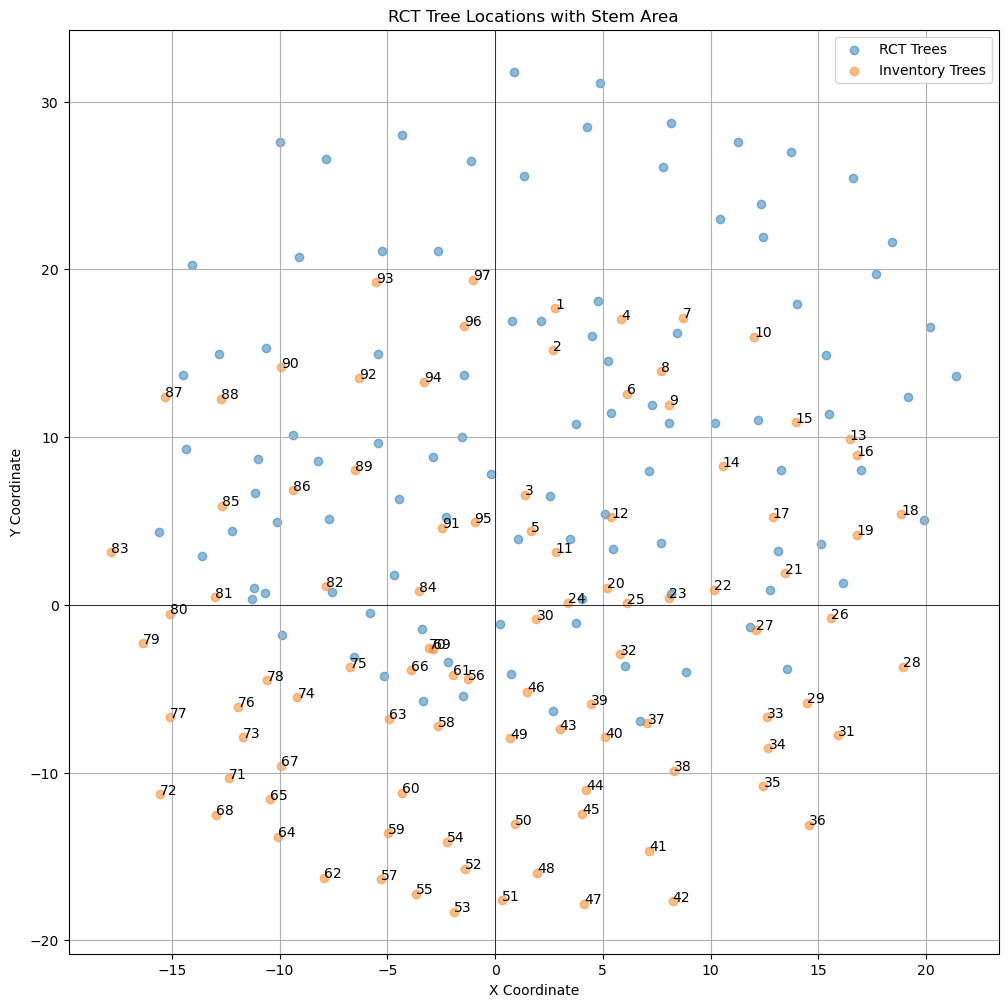

In [9]:
# Plot the RCT tree locations along with inventory data
plt.figure(figsize=(12, 12))

# Scatter plot for tree_merged_df
plt.scatter(rct_df['x'], rct_df['y'], alpha=0.5, label='RCT Trees')

# Scatter plot for inventory_df
plt.scatter(inventory_df['x'], inventory_df['y'], alpha=0.5, label='Inventory Trees')

# Adding tree ID labels for inventory_df points
for i in range(inventory_df.shape[0]):
    plt.text(inventory_df['x'][i], inventory_df['y'][i], f"{inventory_df['tree_number'][i]}")

# Adding labels and grid
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('RCT Tree Locations with Stem Area')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


In [52]:
import numpy as np
import open3d as o3d
import pandas as pd

# Convert dataframes to numpy arrays of points
source_points = tree_merged_df[['x', 'y']].to_numpy()
target_points = inventory_df[['x', 'y']].to_numpy()

# Ensure points are in the correct shape (Nx3) for Open3D by adding a z dimension of 0
source_points = np.hstack((source_points, np.zeros((source_points.shape[0], 1))))
target_points = np.hstack((target_points, np.zeros((target_points.shape[0], 1))))

# Convert numpy arrays to open3d point clouds
source_pcd = o3d.geometry.PointCloud()
source_pcd.points = o3d.utility.Vector3dVector(source_points)

target_pcd = o3d.geometry.PointCloud()
target_pcd.points = o3d.utility.Vector3dVector(target_points)

# Perform ICP
threshold = 10.0  # Distance threshold, can be adjusted
trans_init = np.eye(4)  # Initial transformation

icp_result = o3d.pipelines.registration.registration_icp(
    source_pcd, target_pcd, threshold, trans_init,
    o3d.pipelines.registration.TransformationEstimationPointToPoint()
)

# Extract translation component
translation = icp_result.transformation[:2, 3]
print("Translation:", translation)

# Apply translation to tree_merged_df
tree_merged_df['x_translated'] = tree_merged_df['x'] + translation[0]
tree_merged_df['y_translated'] = tree_merged_df['y'] + translation[1]

# Display the updated DataFrame
tree_merged_df

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Translation: [ -2.01893814 -10.19665873]


,x,y,z,tree_id,DBH,crown_radius,height,stem_area,x_translated,y_translated
0,-15.6104,4.3112,1.6299,1,0.1404,2.0305,13.0426,6.192758,-17.629338,-5.885459
1,-14.4935,13.7130,1.2100,2,0.1480,4.4902,17.1850,6.881345,-16.512438,3.516341
2,-14.3482,9.2736,1.5300,3,0.1652,3.5993,19.0333,8.573733,-16.367138,-0.923059
3,-13.6061,2.8842,1.8400,4,0.1436,3.0701,16.8033,6.478266,-15.625038,-7.312459
4,-14.0634,20.2596,0.9700,5,0.1280,3.0166,17.2500,5.147185,-16.082338,10.062941
...,...,...,...,...,...,...,...,...,...,...
94,19.9154,5.0651,1.9500,95,0.1634,3.7741,16.2340,8.387914,17.896462,-5.131559
95,19.1359,12.3991,1.6400,96,0.1336,4.1620,17.4833,5.607416,17.116962,2.202441
96,20.1713,16.5324,1.3900,97,0.1220,3.0141,15.4950,4.675947,18.152362,6.335741
97,21.4034,13.6195,1.5300,98,0.1676,3.2966,19.9194,8.824658,19.384462,3.422841


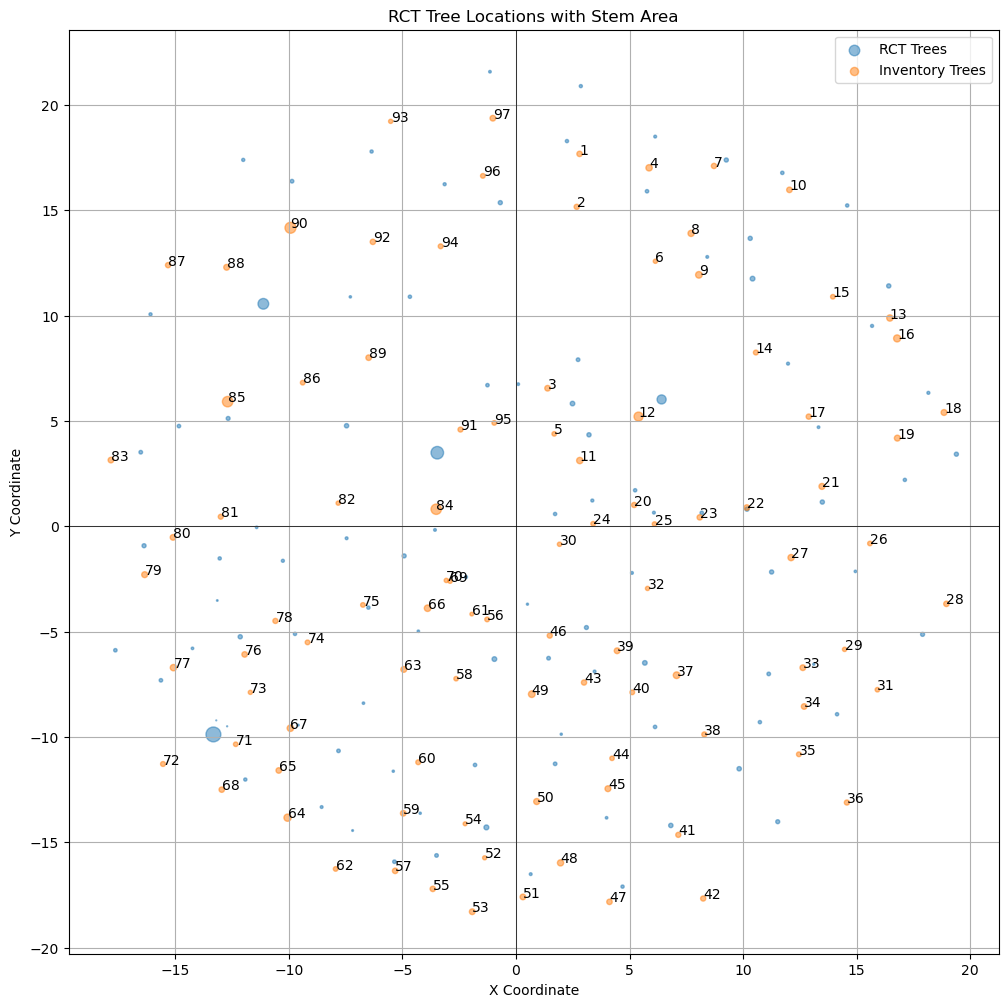

In [53]:
# Calculate stem area
tree_merged_df['stem_area'] = np.pi * (tree_merged_df['DBH'] ** 2) * 100

# Plot the RCT tree locations along with inventory data
plt.figure(figsize=(12, 12))

# Scatter plot for tree_merged_df
plt.scatter(tree_merged_df['x_translated'], tree_merged_df['y_translated'], s=tree_merged_df['stem_area'], alpha=0.5, label='RCT Trees')

# Scatter plot for inventory_df
plt.scatter(inventory_df['x'], inventory_df['y'], s=inventory_df['dbh'], alpha=0.5, label='Inventory Trees')

# Adding tree ID labels for inventory_df points
for i in range(inventory_df.shape[0]):
    plt.text(inventory_df['x'][i], inventory_df['y'][i], f"{inventory_df['tree_number'][i]}")

# Adding labels and grid
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('RCT Tree Locations with Stem Area')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

### Load updated tree locations from CloudComapre

In [54]:
translated_tree_merged_df = pd.read_csv('../data/raycloud_trees_translated.txt', delimiter=' ')
translated_tree_merged_df

,X,Y,Z,tree_id,DBH,crown_radius,height
0,-15.664546,-11.015968,-0.105741,1.0,0.1404,2.0305,13.042600
1,-16.429562,-1.569681,-0.101535,2.0,0.1480,4.4902,17.184999
2,-15.406797,-5.902440,0.012238,3.0,0.1652,3.5993,19.033300
3,-13.414989,-12.026480,0.020968,4.0,0.1436,3.0701,16.803301
4,-17.302080,4.936921,-0.043265,5.0,0.1280,3.0166,17.250000
...,...,...,...,...,...,...,...
94,19.016317,-3.270736,-0.059462,95.0,0.1634,3.7741,16.233999
95,16.801737,3.770971,-0.024330,96.0,0.1336,4.1620,17.483299
96,16.997881,8.034256,-0.092531,97.0,0.1220,3.0141,15.495000
97,18.782034,5.419025,-0.097632,98.0,0.1676,3.2966,19.919399


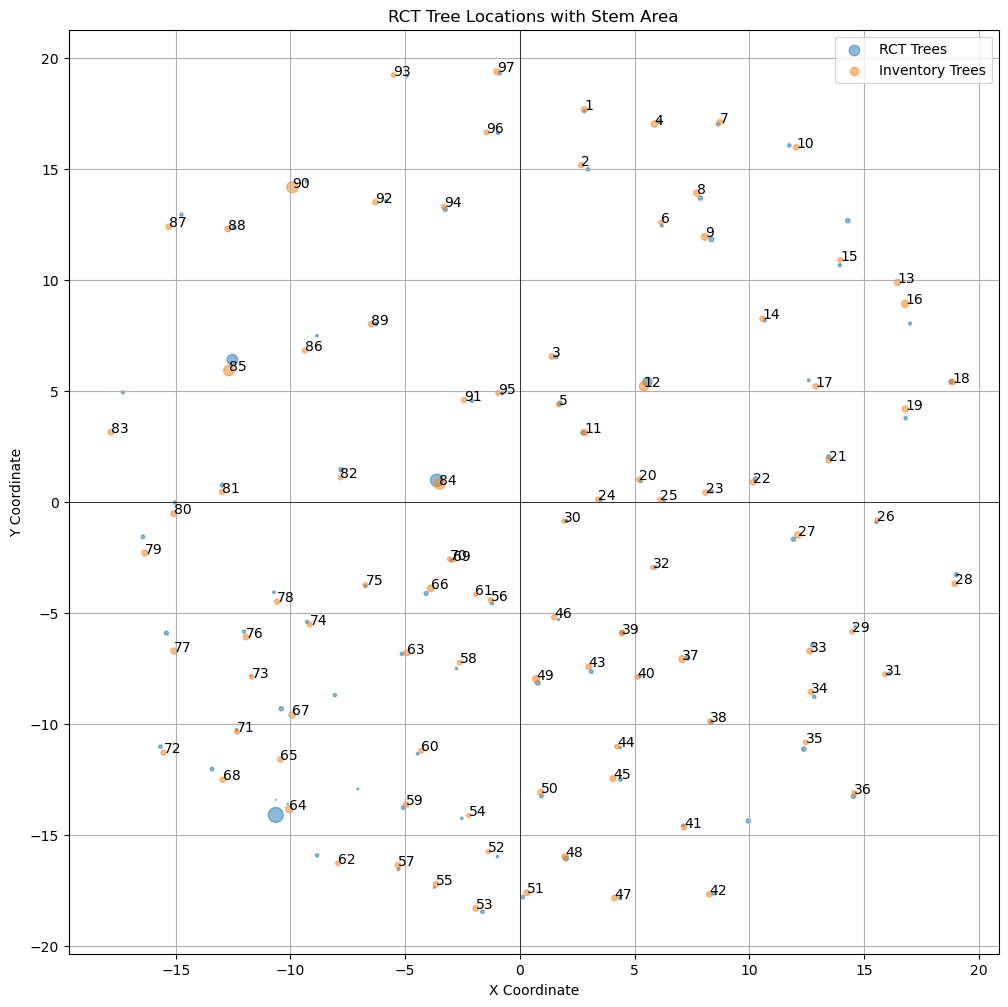

In [55]:
# Calculate stem area
translated_tree_merged_df['stem_area'] = np.pi * (translated_tree_merged_df['DBH'] ** 2) * 100

# Plot the RCT tree locations along with inventory data
plt.figure(figsize=(12, 12))

# Scatter plot for tree_merged_df
plt.scatter(translated_tree_merged_df['X'], translated_tree_merged_df['Y'], s=translated_tree_merged_df['stem_area'], alpha=0.5, label='RCT Trees')

# Scatter plot for inventory_df
plt.scatter(inventory_df['x'], inventory_df['y'], s=inventory_df['dbh'], alpha=0.5, label='Inventory Trees')

# Adding tree ID labels for inventory_df points
for i in range(inventory_df.shape[0]):
    plt.text(inventory_df['x'][i], inventory_df['y'][i], f"{inventory_df['tree_number'][i]}")

# Adding labels and grid
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('RCT Tree Locations with Stem Area')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

In [56]:
import geopandas as gpd
from shapely.geometry import Point

# Create GeoDataFrames
translated_tree_merged_gdf = gpd.GeoDataFrame(
    translated_tree_merged_df, 
    geometry=[Point(xy) for xy in zip(translated_tree_merged_df['X'], translated_tree_merged_df['Y'])],
    crs="EPSG:4326"
)

inventory_gdf = gpd.GeoDataFrame(
    inventory_df, 
    geometry=[Point(xy) for xy in zip(inventory_df['x'], inventory_df['y'])],
    crs="EPSG:4326"
)

# Perform spatial join
joined_gdf = gpd.sjoin_nearest(translated_tree_merged_gdf, inventory_gdf, how="inner", distance_col="distance")

# Display the result
joined_gdf

#save to csv
joined_gdf.to_csv('../data/joined_trees.csv', index=False)


/home/tim/mambaforge/envs/data-viz/lib/python3.11/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


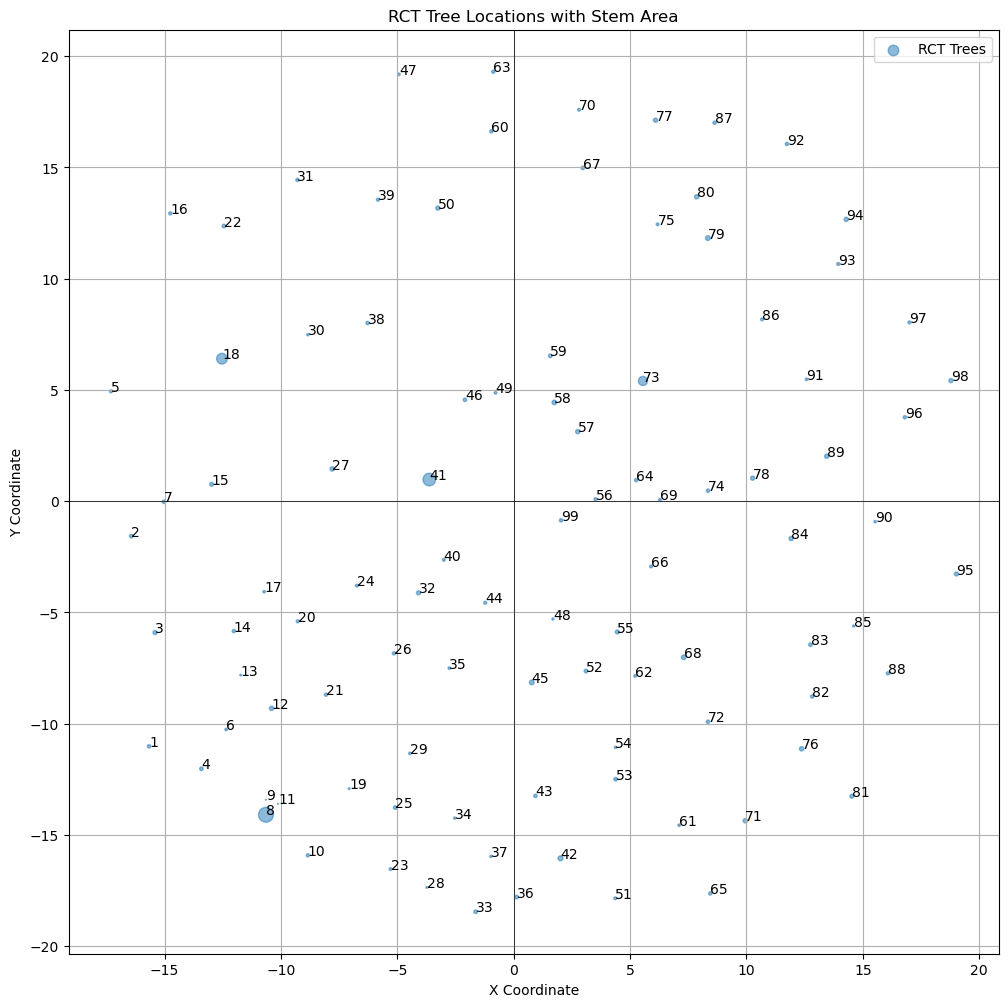

In [57]:
# Calculate stem area
joined_gdf['stem_area'] = np.pi * (joined_gdf['DBH'] ** 2) * 100

# Plot the RCT tree locations along with inventory data
plt.figure(figsize=(12, 12))

# Scatter plot for tree_merged_df
plt.scatter(joined_gdf['X'], joined_gdf['Y'], s=joined_gdf['stem_area'], alpha=0.5, label='RCT Trees')

# Scatter plot for inventory_df
# plt.scatter(inventory_df['x'], inventory_df['y'], s=inventory_df['dbh'], alpha=0.5, label='Inventory Trees')

# # Adding tree ID labels for inventory_df points
# for i in range(inventory_df.shape[0]):
#     plt.text(inventory_df['x'][i], inventory_df['y'][i], f"{inventory_df['tree_number'][i]}")

# Adding tree ID labels for inventory_df points
for i in range(joined_gdf.shape[0]):
    plt.text(joined_gdf['X'][i], joined_gdf['Y'][i], f"{int(joined_gdf['tree_id'][i])}")


# Adding labels and grid
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('RCT Tree Locations with Stem Area')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()